# Boston House Prices

## Attribute Information

Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$] (which will later be renamed as Price)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


## loading boston house pricing dataset

In [3]:
data = "/Users/mac/Downloads/boston.xls"
boston_df = pd.read_excel(data)

## preparing the dataset

In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [5]:
boston_df = boston_df.rename(columns={'MV': 'Price'})

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  Price   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
boston_df['CHAS'] = boston_df['CHAS'].astype(float)
boston_df['RAD'] = boston_df['RAD'].astype(float)

In [9]:
boston_df['TAX'] = boston_df['TAX'].astype(float)

In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    float64
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    float64
 9   TAX     506 non-null    float64
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  Price   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [12]:
boston_df.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
Price    0
dtype: int64

## Analyzing the correlated features

In [13]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

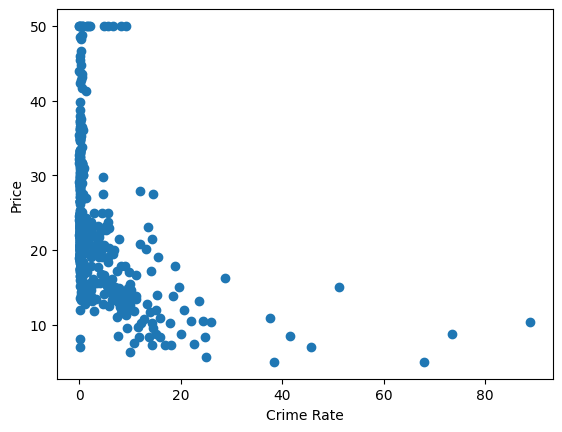

In [14]:
plt.scatter(boston_df['CRIM'], boston_df['Price']);
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

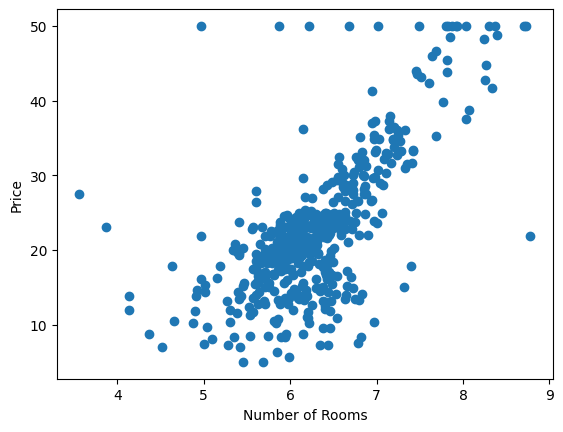

In [15]:
plt.scatter(boston_df['RM'], boston_df['Price']);
plt.xlabel("Number of Rooms")
plt.ylabel("Price")

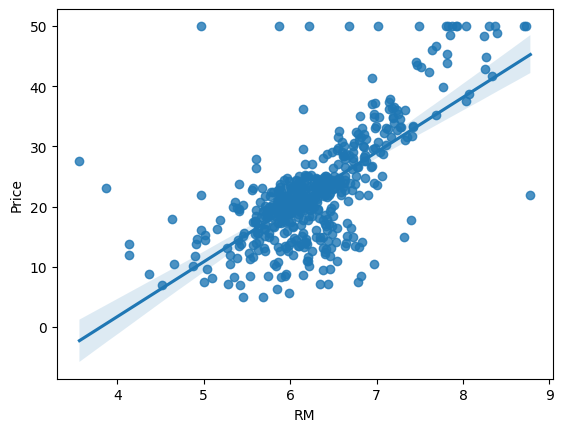

In [16]:
import seaborn as sns
sns.regplot(x="RM", y="Price", data=boston_df);

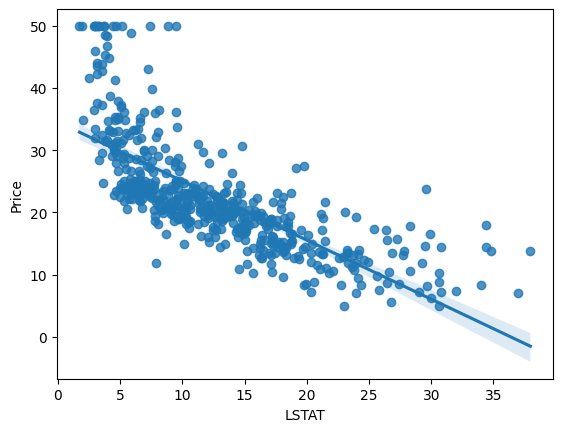

In [17]:
sns.regplot(x="LSTAT", y="Price", data=boston_df);

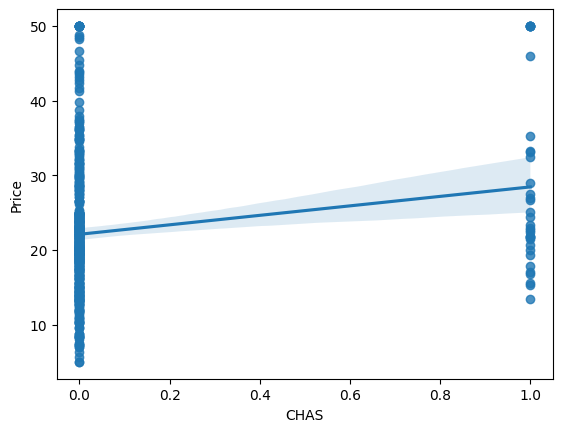

In [18]:
sns.regplot(x="CHAS", y="Price", data=boston_df);

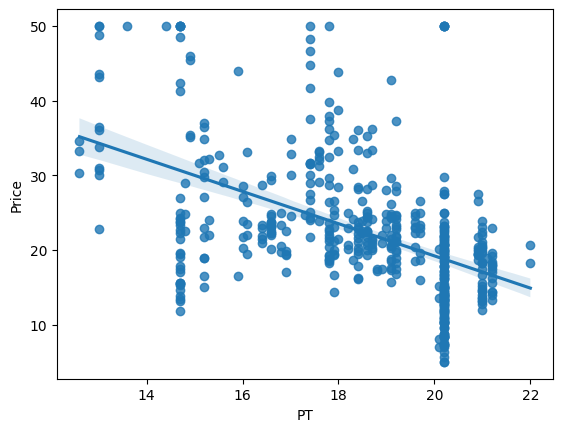

In [19]:
sns.regplot(x="PT", y="Price", data=boston_df);

## splitting the data for modeling

In [20]:
## independent and dependent features

X = boston_df.iloc[:, :-1]
y = boston_df.iloc[:, -1]

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33


In [22]:
y.head()

0    24.000000
1    21.600000
2    34.700001
3    33.400002
4    36.200001
Name: Price, dtype: float64

In [23]:
## train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [24]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.700001,6.0622,3.0,222.0,18.700001,394.119995,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.500000,2.7301,6.0,432.0,17.799999,393.299988,12.040000
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.799999,5.1004,3.0,233.0,17.900000,396.899994,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.299999,4.4986,4.0,307.0,21.000000,386.850006,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.000000,2.9084,24.0,666.0,20.200001,368.739990,18.129999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.900002,2.2110,5.0,384.0,20.900000,395.670013,18.660000
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.099998,4.4290,3.0,223.0,18.600000,388.649994,13.000000
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.700001,8.3440,4.0,280.0,17.000000,390.940002,5.990000
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.599998,2.1247,24.0,666.0,20.200001,109.849998,23.270000


In [25]:
## standardizing the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
import pickle
pickle.dump(scaler,open('scaling.pkl', 'wb'))

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_train

array([[-0.41425879, -0.50512499, -1.29214217, ...,  0.18727102,
         0.39651416, -1.0153161 ],
       [-0.40200818, -0.50512499, -0.16208343, ..., -0.21209022,
         0.38706728, -0.05366252],
       [-0.39721054, -0.50512499, -0.6094886 , ..., -0.16771666,
         0.42854109, -0.31132372],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707705,
         0.35987911, -0.90549333],
       [ 0.926113  , -0.50512499,  1.00549961, ...,  0.85287195,
        -2.87841349,  1.52750443],
       [-0.3903055 , -0.50512499, -0.37135353, ...,  1.16348521,
        -3.3282883 , -0.25218835]])

In [30]:
X_test

array([[-0.40680101, -0.50512499, -1.02225584, ..., -0.74457046,
         0.41241248, -0.47605795],
       [-0.41105675,  1.26662874, -0.68165071, ..., -0.30083651,
         0.42854109, -1.25185755],
       [-0.40511991, -0.50512499,  2.3967851 , ...,  0.80849839,
         0.35031691,  0.79535225],
       ...,
       [-0.35439904, -0.50512499, -0.7119588 , ..., -0.38958363,
         0.25688596, -1.0969792 ],
       [ 0.25423453, -0.50512499,  1.00549961, ...,  0.85287195,
        -2.98970131,  0.53487502],
       [ 0.77732465, -0.50512499,  1.00549961, ...,  0.85287195,
         0.33199939,  0.56585085]])

## Model Training

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
## print the coefficients and intercept

print(lr.coef_)

[-1.10834606  0.80843998  0.34313504  0.81386425 -1.79804334  2.91385779
 -0.29893915 -2.94251136  2.09419346 -1.44706731 -2.05232256  1.02375187
 -3.88579018]


In [35]:
print(lr.intercept_)

23.0158192288983


In [36]:
## on which parameters the model has been trained

lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [37]:
## prediction with test data

lr_pred = lr.predict(X_test)
lr_pred

array([28.64895916, 36.49501322, 15.41119213, 25.40321346, 18.85527915,
       23.14668859, 17.39212432, 14.07859719, 23.0369279 , 20.59943284,
       24.8228625 , 18.53057127, -6.86543563, 21.80172245, 19.22571286,
       26.19191966, 20.27734033,  5.61596472, 40.44888032, 17.57695927,
       27.44319008, 30.17159598, 10.94055784, 24.02083048, 18.07693849,
       15.93474908, 23.1261401 , 14.56052242, 22.33482536, 19.3257627 ,
       22.16564963, 25.19476114, 25.31372524, 18.51345102, 16.62232872,
       17.50268528, 30.94992974, 20.19201676, 23.90440487, 24.86975443,
       13.93767808, 31.82504713, 42.56978939, 17.62323799, 27.01963199,
       17.19006543, 13.80594079, 26.10356508, 20.31516055, 30.08649429,
       21.31240509, 34.15739626, 15.60445085, 26.1124767 , 39.31613505,
       22.99282047, 18.95764683, 33.05555606, 24.85114219, 12.91729492,
       22.68101458, 30.8033639 , 31.63522097, 16.29833681, 21.07380042,
       16.57699602, 20.36362023, 26.15615941, 31.06833003, 11.98

## Assumptions

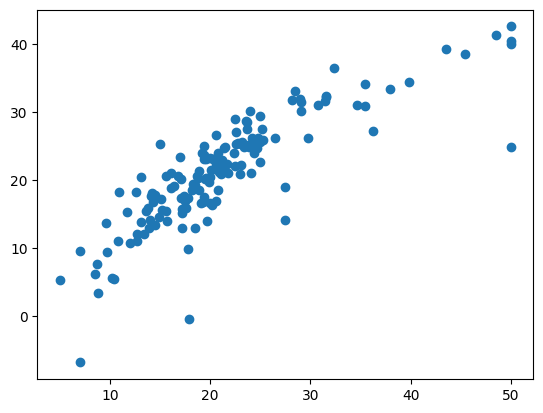

In [38]:
## plot a scatter plot for the prediction

plt.scatter(y_test, lr_pred);

In [39]:
## error with respect to y_test and lr_pred

residuals = y_test - lr_pred

In [40]:
residuals

173    -5.048959
274    -4.095012
491    -1.811192
72     -2.603214
452    -2.755279
         ...    
441    -0.303671
23      1.114057
225    10.016574
433    -2.382863
447    -5.685616
Name: Price, Length: 152, dtype: float64

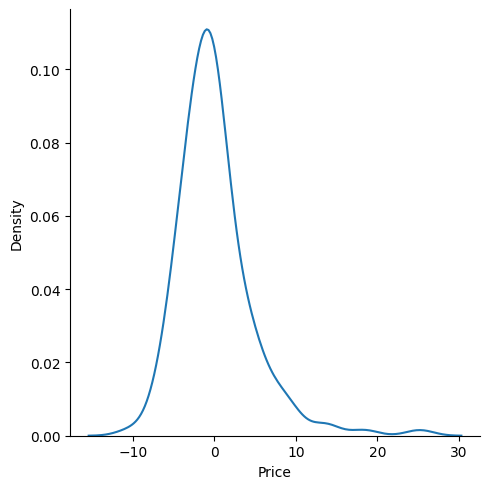

In [41]:
## plotting with residuals

sns.displot(residuals, kind="kde");

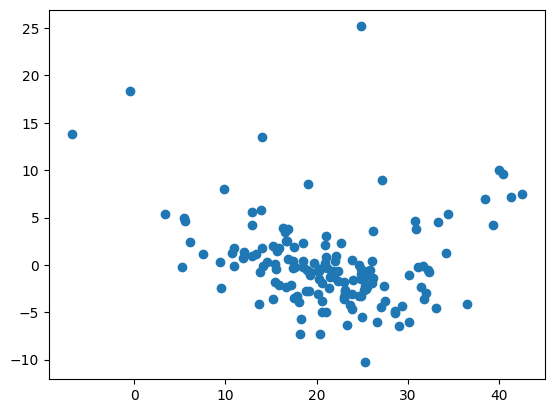

In [42]:
## scatterplot with respect to prediction and residuals
## uniform distribution

plt.scatter(lr_pred, residuals);

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
## and root mean squared error

print(f" MSE: {mean_absolute_error(y_test, lr_pred)}")
print(f" MAE: {mean_squared_error(y_test, lr_pred)}")

print(f" RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred))}")



 MSE: 3.1627097964846254
 MAE: 21.51744298304888
 RMSE: 4.638689791638247


## R square and adjusted R square

###### R^2 = 1 - SSR / SST

R^2 - coefficient of determination;
SSR - sum of squares of residuals;
SST - total sum of squares;

In [44]:
from sklearn.metrics import r2_score
score = r2_score(y_test, lr_pred)
score

0.7112260293950654

###### Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

where R2 - the R2 of the model;
n - number of observations;
k - the number of predictor variables

In [45]:
## display the adjusted r-squared

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226843380788

## new data prediction

In [46]:
boston_copy =boston_df.copy()

In [47]:
boston_copy.values[0].reshape(1,-1)

array([[6.32000000e-03, 1.80000000e+01, 2.30999994e+00, 0.00000000e+00,
        5.37999988e-01, 6.57499981e+00, 6.51999969e+01, 4.09000015e+00,
        1.00000000e+00, 2.96000000e+02, 1.53000002e+01, 3.96899994e+02,
        4.98000002e+00, 2.40000000e+01]])

In [48]:
num_features = len(lr.coef_)

In [49]:
num_features

13

In [50]:
## transformation of new data
## also, we have to make sure our model takes only the first 13 features

input_data = scaler.transform(boston_copy.iloc[0, :num_features].values.reshape(1, -1))

/Users/mac/Documents/bostonMLprj/bostonhousepricing/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
input_data

array([[-0.41709234,  0.29216419, -1.27338004, -0.28154625, -0.16513641,
         0.34715875, -0.1303007 ,  0.1526717 , -0.97798895, -0.66777595,
        -1.32142469,  0.42854109, -1.04769975]])

In [52]:
lr.predict(input_data)

array([30.08649429])

## pickling the model file for deployment

In [81]:
import pickle

In [82]:
pickle.dump(lr, open('lrmodel.pkl', 'wb'))

In [83]:
pickled_model = pickle.load(open('lrmodel.pkl', 'rb'))

In [84]:
## prediction
pickled_model.predict(input_data)

array([30.08649429])